# Local resolution estimation with the one-image FRC

This notebook shows how Quoll's tools can be used to calculate the one-image FRC. The one-image FRC measure implemented here is a modification of [miplib](https://github.com/sakoho81/miplib). The one-image FRC calculation is calibrated to match the gold standard two-image FRC using a calibration function, which is derived here for EM images. The original `miplib` calibration function was calculated for fluorescence microscopy.

In [1]:
import os
import matplotlib.pyplot as plt
import tifffile

from quoll.io import reader
from quoll.frc import oneimg

c:\Users\dmv31621\.conda\envs\quoll_1\lib\site-packages\cupy\_environment.py:214: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  'CUDA path could not be detected.'


## Choose an image to load

Load an image as a Quoll Image object, this contains the attributes needed to calculate FRC and other image quality measures.

In [2]:
QuollImg = reader.Image(
    filename="../data/SerialFIB57_2048x2048.tif",
    pixel_size=3.3724,
    unit="nm"
)

A Quoll Image object contains the following attributes
- `filename`
- `pixel_size`: size of each pixel in physical units
- `unit`: unit of measurement for pixel size
- `tiles`: a dictionary, where the keys are the path to each tile and the values are the tile as an array
- `img_data`: image as an array
- `img_dims`: dimensions of the image in (z,x,y)
- `img_bitdepth`: bit depth of the image.

Any of the Quoll Image attributes can be called using the following cell

In [3]:
# Just change out the attribute you want to retrieve
QuollImg.pixel_size

3.3724

The image can also be displayed with the `Image.show` method

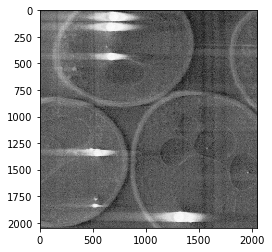

In [4]:
QuollImg.show()

## Calculating local FRC

The function `oneimg.calc_local_frc` returns a Pandas DataFrame of the local resolution of each patch of an image.

This function requires the following inputs:
- `Image`: a Quoll Image object
- `tile_size`: length of one side of the square tile in pixels. This must be above 100. A good default is usually 256.
- `tiles_dir`: path to the directory where you will save the tiles.

In [5]:
results_df = oneimg.calc_local_frc(
    Image=QuollImg,
    tile_size=256,
    tiles_dir="./test_tiles_dir"
)

results_df

c:\Users\dmv31621\.conda\envs\quoll_1\lib\site-packages\pims\bioformats.py:53: UserWarning: loci_tools.jar not found, downloading
  warn('loci_tools.jar not found, downloading')
c:\Users\dmv31621\.conda\envs\quoll_1\lib\site-packages\jpype\_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)
c:\Users\dmv31621\.conda\envs\quoll_1\lib\site-packages\pims\bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('D

,Resolution
000.tif,17.824817
001.tif,23.816892
002.tif,16.999376
003.tif,18.301705
004.tif,18.487262
005.tif,18.573947
006.tif,22.536375
007.tif,19.995925
008.tif,17.347424
009.tif,20.452842


We can now make use of the resolutions data. One example is to just describe the distributions.

In [10]:
results_df.Resolution.describe()

count    64.000000
mean     18.949491
std       1.934696
min      14.690358
25%      17.579421
50%      18.753015
75%      20.028791
max      24.423028
Name: Resolution, dtype: float64

We can also plot the resolutions

Text(0, 0.5, 'Number of patches')

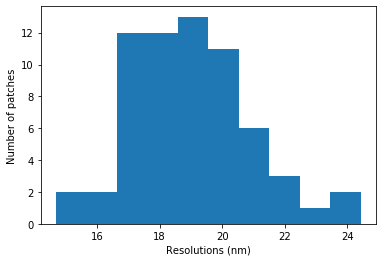

In [11]:
plt.hist(results_df.Resolution)
plt.xlabel("Resolutions (nm)")
plt.ylabel("Number of patches")

Or plot a heatmap of the resolutions

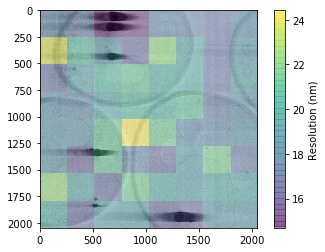

In [12]:
resolution_heatmap = oneimg.plot_resolution_heatmap(
    Image=QuollImg,
    results_df=results_df
)

# plot the heatmap over the original image

plt.figure()
plt.imshow(QuollImg.img_data, cmap="Greys_r")
plt.imshow(resolution_heatmap, cmap="viridis", alpha=0.4)
plt.colorbar(label=f"Resolution ({QuollImg.unit})")

The resolution heatmaps can also be saved separately as tiff files

In [13]:
output_fname = "test_heatmap.tif"  # edit as required

tifffile.imwrite(
    output_fname,
    resolution_heatmap.astype("uint8"),
)